# **Evaluation Techniques for classification models**

### **Problem Statement**
Predict the species of iris flower based on its features.
### **Dataset:** 
he Iris dataset includes measurements of iris flowers' sepal length, sepal width, petal length, and petal width, and it classifies them into three different species: setosa, versicolor, and virginica.

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names


df = pd.DataFrame(X, columns=feature_names)

X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.3, random_state=42, stratify=y
)

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), feature_names)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LogisticRegression(
        penalty='elasticnet',
        dual=False,
        tol=1e-4,
        C=0.5,
        fit_intercept=True,
        intercept_scaling=1,
        class_weight='balanced',
        random_state=42,
        solver='saga',
        max_iter=5000,
        multi_class='ovr',
        verbose=0,
        warm_start=False,
        n_jobs=-1,
        l1_ratio=0.5
    ))
])

pipeline.fit(X_train, y_train)

print("Pipeline and Model Trained Successfully")

Pipeline and Model Trained Successfully


In [183]:
model = pipeline.named_steps['model']
print("Model Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"Class {i}:")
    print(coef)

print("Model Intercept:")
print(model.intercept_)

feature_names_poly = pipeline.named_steps['poly'].get_feature_names_out()
coefficients = model.coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names_poly,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)


Model Coefficients:
Class 0:
[-0.61201611  0.52432811 -1.24294274 -1.12720942  0.          0.
  0.11569748  0.1165151   0.         -0.07285054 -0.06893245  0.52908163
  0.43946639  0.27121486]
Class 1:
[ 0.          0.          0.         -0.47264421  0.          0.
 -0.21774228 -0.22282926  0.          0.16850451  0.53513069 -1.25822865
 -1.38862749 -1.66209173]
Class 2:
[ 0.09890918 -0.14612867  1.4773237   1.95249327  0.          0.
  0.          0.          0.          0.         -0.12353033  0.4799301
  0.56924727  0.88336523]
Model Intercept:
[-2.74380852  3.09258493 -2.79377376]


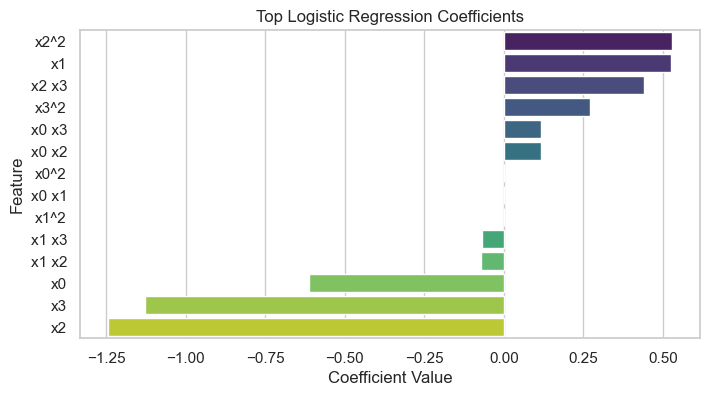

In [184]:
feature_names_poly = pipeline.named_steps['poly'].get_feature_names_out()
coefficients = model.coef_[0]  
coef_df = pd.DataFrame({
    'Feature': feature_names_poly,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.barplot(y='Feature', x='Coefficient', data=coef_df, palette='viridis')
plt.ylabel('Feature')
plt.xlabel('Coefficient Value')
plt.title('Top Logistic Regression Coefficients')
plt.show()

### **Confusion Matrix**

**`sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)`**

Computes the confusion matrix to evaluate the accuracy of a classification.


A confusion matrix is a table used to describe the performance of a classification model. It is such that \( C_{ij} \) represents the number of observations known to be in group \( i \) and predicted to be in group \( j \).

In binary classification, the counts are:
- **True Negatives (TN)**: \( C_{00} \)
- **False Negatives (FN)**: \( C_{10} \)
- **True Positives (TP)**: \( C_{11} \)
- **False Positives (FP)**: \( C_{01} \)

### **Parameters**

- **`y_true`**: array-like of shape (n_samples,)
  - Ground truth (correct) target values.

- **`y_pred`**: array-like of shape (n_samples,)
  - Estimated targets as returned by a classifier.

- **`labels`**: array-like of shape (n_classes), default=None
  - List of labels to index the matrix. This can reorder or select a subset of labels. If None, those that appear at least once in `y_true` or `y_pred` are used in sorted order.

- **`sample_weight`**: array-like of shape (n_samples,), default=None
  - Sample weights. (Added in version 0.18)

- **`normalize`**: {‘true’, ‘pred’, ‘all’}, default=None
  - Normalizes the confusion matrix over the true (rows), predicted (columns) conditions, or the entire population. If None, the confusion matrix will not be normalized.

### **Returns**

- **`C`**: ndarray of shape (n_classes, n_classes)
  - Confusion matrix where the \( i \)-th row and \( j \)-th column entry indicates the number of samples with the true label being the \( i \)-th class and the predicted label being the \( j \)-th class.

### **Additional Information**

Read more in the [User Guide](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).


<Figure size 800x600 with 0 Axes>

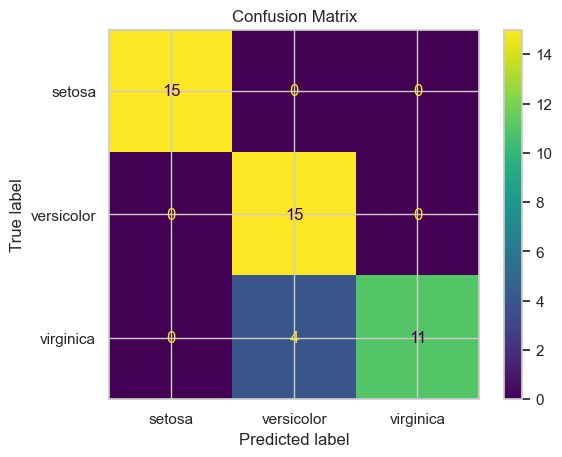

In [185]:
y_pred = pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))  
cmd = ConfusionMatrixDisplay(cm, display_labels=iris.target_names)

plt.figure(figsize=(8, 6))
cmd.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

### **Accuracy**



**`sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)`**

The `accuracy_score` function computes the accuracy of a classification model. Accuracy is either the fraction (default) or the count (when `normalize=False`) of correct predictions.


In multilabel classification, the function returns the subset accuracy. The subset accuracy is 1.0 if the entire set of predicted labels for a sample strictly matches the true set of labels; otherwise, it is 0.0.

For binary or multiclass classification, if \( \hat{y}_i \) is the predicted value of the \( i \)-th sample and \( y_i \) is the corresponding true value, the fraction of correct predictions over \( n \) samples is defined as:

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{n}
$$

Where:
- **Number of Correct Predictions** is the count of samples where \( \hat{y}_i = y_i \).
- **n** is the total number of samples.

### **Formula**

In mathematical terms, if:

- \( y_i \) is the true label for the \( i \)-th sample.
- \( \hat{y}_i \) is the predicted label for the \( i \)-th sample.

Then the accuracy can be computed as:

$$
\text{Accuracy} = \frac{\sum_{i=1}^{n} \mathbf{1}(\hat{y}_i = y_i)}{n}
$$

Where \( \mathbf{1}(\hat{y}_i = y_i) \) is an indicator function that is 1 if \( \hat{y}_i = y_i \) and 0 otherwise.

### **Parameters**

- **`y_true`**: array-like of shape (n_samples,)
  - Ground truth (correct) target values.

- **`y_pred`**: array-like of shape (n_samples,)
  - Estimated targets as returned by a classifier.

- **`normalize`**: bool, default=True
  - If True, returns the fraction of correctly classified samples. Otherwise, returns the number of correctly classified samples.

- **`sample_weight`**: array-like of shape (n_samples,), default=None
  - Sample weights.

### **Returns**

- **`accuracy`**: float or int
  - If `normalize=True`, returns the fraction of correctly classified samples. If `normalize=False`, returns the number of correctly classified samples.


Accuracy of the model: 0.91


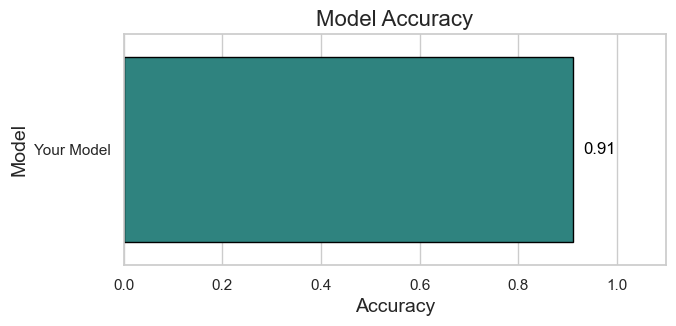

In [186]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.2f}")

data = {
    'Model': ['Your Model'],  # Replace with your model name
    'Accuracy': [accuracy]
}
df = pd.DataFrame(data)

sns.set(style='whitegrid')

plt.figure(figsize=(7, 3))
bar_plot = sns.barplot(x='Accuracy', y='Model', data=df, palette='viridis', edgecolor='black')

for index, row in df.iterrows():
    bar_plot.text(row['Accuracy'] + 0.02, index, f'{row["Accuracy"]:.2f}', 
                  va='center', fontsize=12, color='black')

plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.title('Model Accuracy', fontsize=16)

plt.xlim(0, 1.1)
plt.show()


### **Precision**


**`sklearn.metrics.precision_score(y_true, y_pred, *, average='binary', labels=None, sample_weight=None, zero_division='warn')`**

The `precision_score` function computes the precision of a classification model. Precision is defined as the ratio of true positive predictions to the total number of positive predictions made by the classifier.


Precision is the fraction of relevant instances among the retrieved instances. For binary or multiclass classification, if \( \text{TP} \) represents the number of true positives and \( \text{FP} \) represents the number of false positives, then precision is defined as:

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

### **Parameters**

- **`y_true`**: array-like of shape (n_samples,)
  - Ground truth (correct) target values.

- **`y_pred`**: array-like of shape (n_samples,)
  - Estimated targets as returned by a classifier.

- **`average`**: {'binary', 'micro', 'macro', 'samples', 'weighted'}, default='binary'
  - This parameter is required for multiclass/multilabel targets. If `average` is `None`, the precision score for each class is returned.

- **`labels`**: array-like of shape (n_classes), default=None
  - List of labels to include when `average` is not `None`. If None, all labels will be used.

- **`sample_weight`**: array-like of shape (n_samples,), de`fault=None
  - Sample weights.

- **`zero_division`**: {0, 1, 'warn'}, default='warn'
  - Value to return when there is zero division. The default is to issue a warning and return `0`.

### **Formula**

In binary classification, if:

- \( \text{TP} \) is the number of true positives.
- \( \text{FP} \) is the number of false positives.

Then precision can be computed as:

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$
### **Returns**

- **`precision`**: float or array of float
  - Precision of the positive class in binary classification or average precision if `average` is not `None`. In multilabel classification, it returns precision for each label.


Precision for setosa: 1.00
Precision for versicolor: 0.79
Precision for virginica: 1.00


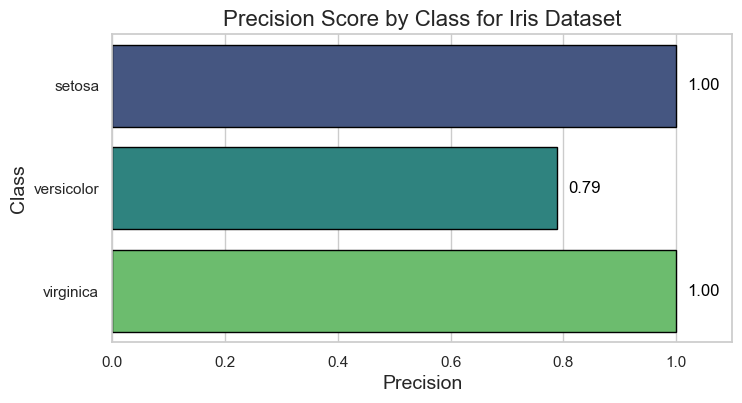

In [187]:
precision_per_class = precision_score(y_test, y_pred, average=None)
class_labels = ['setosa', 'versicolor', 'virginica']  

for label, precision in zip(class_labels, precision_per_class):
    print(f'Precision for {label}: {precision:.2f}')

data = {
    'Class': class_labels,
    'Precision': precision_per_class
}
df = pd.DataFrame(data)

sns.set(style='whitegrid')

plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x='Precision', y='Class', data=df, palette='viridis', edgecolor='black')

for index, row in df.iterrows():
    bar_plot.text(row['Precision'] + 0.02, index, f'{row["Precision"]:.2f}', 
                  va='center', fontsize=12, color='black')

plt.xlabel('Precision', fontsize=14)
plt.ylabel('Class', fontsize=14)
plt.title('Precision Score by Class for Iris Dataset', fontsize=16)
plt.xlim(0, 1.1)
plt.show()


### **Recall (Sensitivity)**


**`sklearn.metrics.recall_score(y_true, y_pred, *, average='binary', labels=None, sample_weight=None, zero_division='warn')`**

The `recall_score` function computes the recall (sensitivity) of a classification model. Recall measures the ability of a classifier to find all the positive instances.


Recall (or Sensitivity) is the fraction of true positive predictions among all actual positives. For binary or multiclass classification, if \( \text{TP} \) represents the number of true positives and \( \text{FN} \) represents the number of false negatives, then recall is defined as:

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

### **Parameters**

- **`y_true`**: array-like of shape (n_samples,)
  - Ground truth (correct) target values.

- **`y_pred`**: array-like of shape (n_samples,)
  - Estimated targets as returned by a classifier.

- **`average`**: {'binary', 'micro', 'macro', 'samples', 'weighted'}, default='binary'
  - This parameter is required for multiclass/multilabel targets. If `average` is `None`, the recall score for each class is returned.

- **`labels`**: array-like of shape (n_classes), default=None
  - List of labels to include when `average` is not `None`. If None, all labels will be used.

- **`sample_weight`**: array-like of shape (n_samples,), default=None
  - Sample weights.

- **`zero_division`**: {0, 1, 'warn'}, default='warn'
  - Value to return when there is zero division. The default is to issue a warning and return `0`.

### **Returns**

- **`recall`**: float or array of float
  - Recall of the positive class in binary classification or average recall if `average` is not `None`. In multilabel classification, it returns recall for each label.

### **Formula**

In binary classification, if:

- \( \text{TP} \) is the number of true positives.
- \( \text{FN} \) is the number of false negatives.

Then recall can be computed as:

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$



Recall for setosa: 1.00
Recall for versicolor: 1.00
Recall for virginica: 0.73


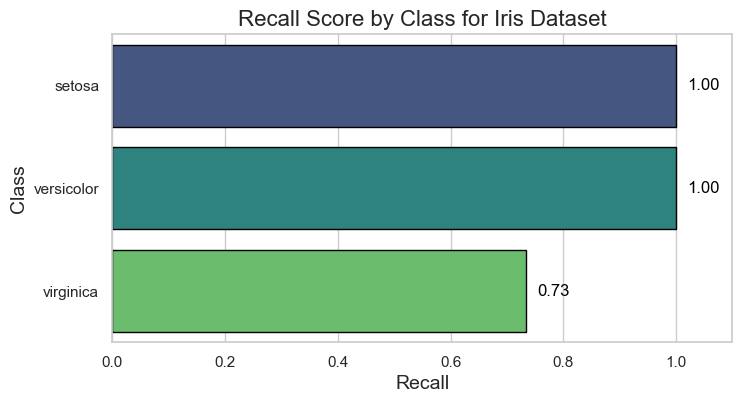

In [188]:
recall_per_class = recall_score(y_test, y_pred, average=None)
class_labels = ['setosa', 'versicolor', 'virginica']  

for label, recall in zip(class_labels, recall_per_class):
    print(f'Recall for {label}: {recall:.2f}')

data = {
    'Class': class_labels,
    'Recall': recall_per_class
}
df = pd.DataFrame(data)

sns.set(style='whitegrid')

plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x='Recall', y='Class', data=df, palette='viridis', edgecolor='black')

for index, row in df.iterrows():
    bar_plot.text(row['Recall'] + 0.02, index, f'{row["Recall"]:.2f}', 
                  va='center', fontsize=12, color='black')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Class', fontsize=14)
plt.title('Recall Score by Class for Iris Dataset', fontsize=16)

plt.xlim(0, 1.1)
plt.show()

### **F1 Score**


**`sklearn.metrics.f1_score(y_true, y_pred, *, average='binary', labels=None, sample_weight=None, zero_division='warn')`**

The `f1_score` function computes the F1 Score of a classification model. The F1 Score is the harmonic mean of precision and recall and is used as a single metric to evaluate the balance between precision and recall.


The F1 Score is particularly useful when you need to balance precision and recall. It is defined as:

$$
\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Where:
- **Precision** is the ratio of true positives to the sum of true positives and false positives.
- **Recall** is the ratio of true positives to the sum of true positives and false negatives.

### **Parameters**

- **`y_true`**: array-like of shape (n_samples,)
  - Ground truth (correct) target values.

- **`y_pred`**: array-like of shape (n_samples,)
  - Estimated targets as returned by a classifier.

- **`average`**: {'binary', 'micro', 'macro', 'samples', 'weighted'}, default='binary'
  - This parameter is required for multiclass/multilabel targets. If `average` is `None`, the F1 Score for each class is returned.

- **`labels`**: array-like of shape (n_classes), default=None
  - List of labels to include when `average` is not `None`. If None, all labels will be used.

- **`sample_weight`**: array-like of shape (n_samples,), default=None
  - Sample weights.

- **`zero_division`**: {0, 1, 'warn'}, default='warn'
  - Value to return when there is zero division. The default is to issue a warning and return `0`.

### **Returns**

- **`f1_score`**: float or array of float
  - F1 Score of the positive class in binary classification or average F1 Score if `average` is not `None`. In multilabel classification, it returns F1 Score for each label.

### **Formula**

In binary classification, if:

- **Precision** \( = \frac{\text{TP}}{\text{TP} + \text{FP}} \)
- **Recall** \( = \frac{\text{TP}}{\text{TP} + \text{FN}} \)

Then the F1 Score can be computed as:

$$
\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$



F1 Score for setosa: 1.00
F1 Score for versicolor: 0.88
F1 Score for virginica: 0.85


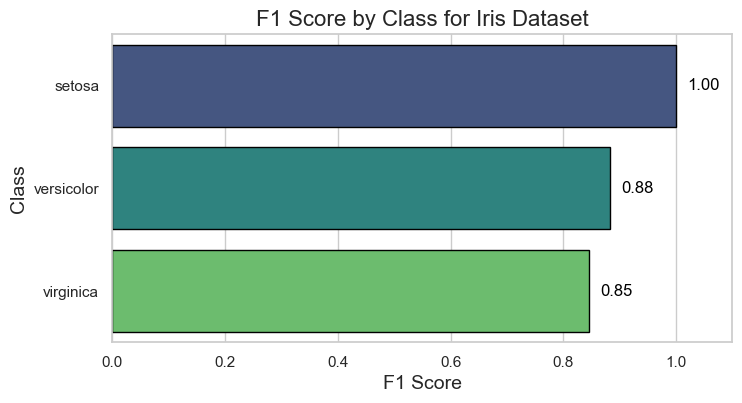

In [189]:
f1_scores = f1_score(y_test, y_pred, average=None)
class_labels = ['setosa', 'versicolor', 'virginica'] 

for label, f1 in zip(class_labels, f1_scores):
    print(f'F1 Score for {label}: {f1:.2f}')

data = {
    'Class': class_labels,
    'F1 Score': f1_scores
}
df = pd.DataFrame(data)
sns.set(style='whitegrid')

plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x='F1 Score', y='Class', data=df, palette='viridis', edgecolor='black')

for index, row in df.iterrows():
    bar_plot.text(row['F1 Score'] + 0.02, index, f'{row["F1 Score"]:.2f}', 
                  va='center', fontsize=12, color='black')
    
plt.xlabel('F1 Score', fontsize=14)
plt.ylabel('Class', fontsize=14)
plt.title('F1 Score by Class for Iris Dataset', fontsize=16)

plt.xlim(0, 1.1)
plt.show()


### **ROC Curve**


**`sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)`**

The ROC (Receiver Operating Characteristic) curve is a graphical representation of a classification model's performance. It plots the true positive rate (recall) against the false positive rate at various threshold settings.


The ROC curve illustrates the trade-off between sensitivity (true positive rate) and 1-specificity (false positive rate). The curve is plotted with the true positive rate (recall) on the y-axis and the false positive rate on the x-axis.

### **True Positive Rate (TPR) and False Positive Rate (FPR)**

- **True Positive Rate (TPR)**, also known as Recall, is defined as:

  $$
  \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
  $$

- **False Positive Rate (FPR)** is defined as:

  $$
  \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
  $$

Where:
- **TP**: True Positives
- **FP**: False Positives
- **TN**: True Negatives
- **FN**: False Negatives

### **Parameters**

- **`y_true`**: array-like of shape (n_samples,)
  - True binary labels.

- **`y_score`**: array-like of shape (n_samples,)
  - Target scores, probability estimates, or decision function.

- **`pos_label`**: int or str, default=None
  - The label of the positive class. If None, the positive class is determined automatically.

- **`sample_weight`**: array-like of shape (n_samples,), default=None
  - Sample weights.

- **`drop_intermediate`**: bool, default=True
  - Whether to drop some thresholds which would not affect the results.

### **Returns**

- **`fpr`**: array of shape (n_thresholds + 1,)
  - False Positive Rates.

- **`tpr`**: array of shape (n_thresholds + 1,)
  - True Positive Rates.

- **`thresholds`**: array of shape (n_thresholds,)
  - Thresholds used to compute the ROC curve.

### **AUC (Area Under the Curve)**

The Area Under the ROC Curve (AUC) is a single scalar value that summarizes the performance of the classifier. It represents the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance.

The formula for AUC is:

$$
\text{AUC} = \int_{0}^{1} \text{TPR} \, d(\text{FPR})
$$



ROC AUC for setosa: 1.00
ROC AUC for versicolor: 0.99
ROC AUC for virginica: 0.99


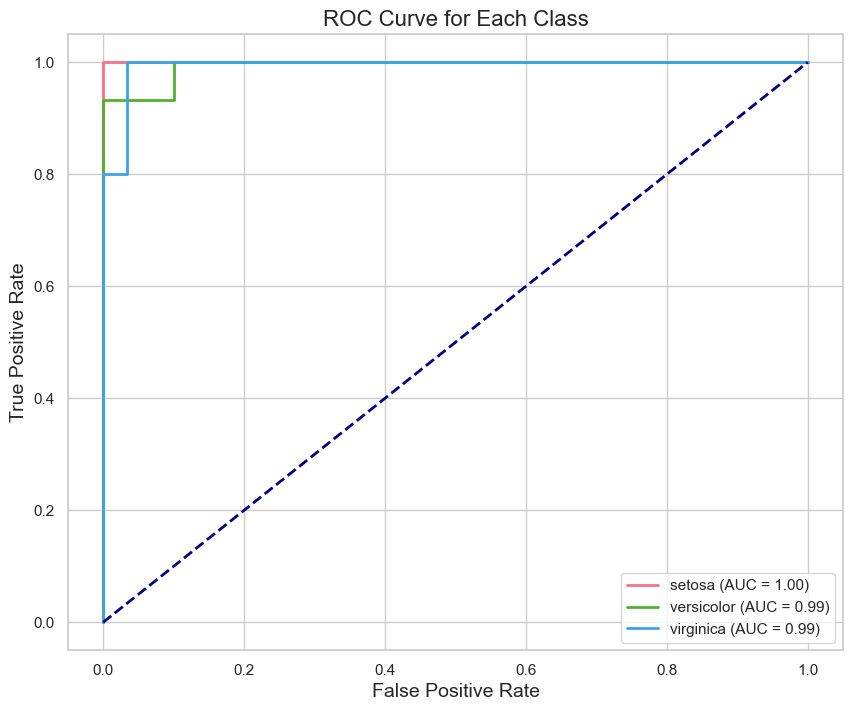

In [190]:
class_labels = ['setosa', 'versicolor', 'virginica']
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_prob = pipeline.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])

for i in range(y_test_bin.shape[1]):
    print(f"ROC AUC for {class_labels[i]}: {roc_auc[i]:.2f}")

plt.figure(figsize=(10, 8))
colors = sns.color_palette("husl", len(roc_auc))  # Color palette for multiple lines

for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve for Each Class', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### **AUC (Area Under the Curve)**

**`sklearn.metrics.auc(x, y)`**

The AUC (Area Under the Curve) refers to the area under the ROC (Receiver Operating Characteristic) curve, which provides a single value that summarizes the performance of a classification model. The AUC measures the model’s ability to discriminate between positive and negative classes.



The AUC value ranges from 0 to 1:
- **AUC = 1**: Perfect model, where the ROC curve passes through the top-left corner.
- **AUC = 0.5**: Model with no discrimination ability, equivalent to random guessing.
- **AUC < 0.5**: Model performing worse than random guessing, indicating that the classifier is inverted.

### **Formula**

The AUC is computed as the integral of the True Positive Rate (TPR) against the False Positive Rate (FPR) over all thresholds:

$$
\text{AUC} = \int_{0}^{1} \text{TPR} \, d(\text{FPR})
$$

Where:
- **True Positive Rate (TPR)** is defined as:

  $$
  \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
  $$

- **False Positive Rate (FPR)** is defined as:

  $$
  \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
  $$

### **Parameters**

- **`x`**: array-like of shape (n_samples,)
  - False Positive Rates.

- **`y`**: array-like of shape (n_samples,)
  - True Positive Rates.

### **Returns**

- **`auc`**: float
  - The AUC value of the ROC curve.



ROC AUC for setosa: 1.00
setosa has a perfect AUC of 1, indicating a perfect model for this class.
ROC AUC for versicolor: 0.99
versicolor has an AUC of 0.99, indicating that the model has some discriminatory power for this class.
ROC AUC for virginica: 0.99
virginica has an AUC of 0.99, indicating that the model has some discriminatory power for this class.


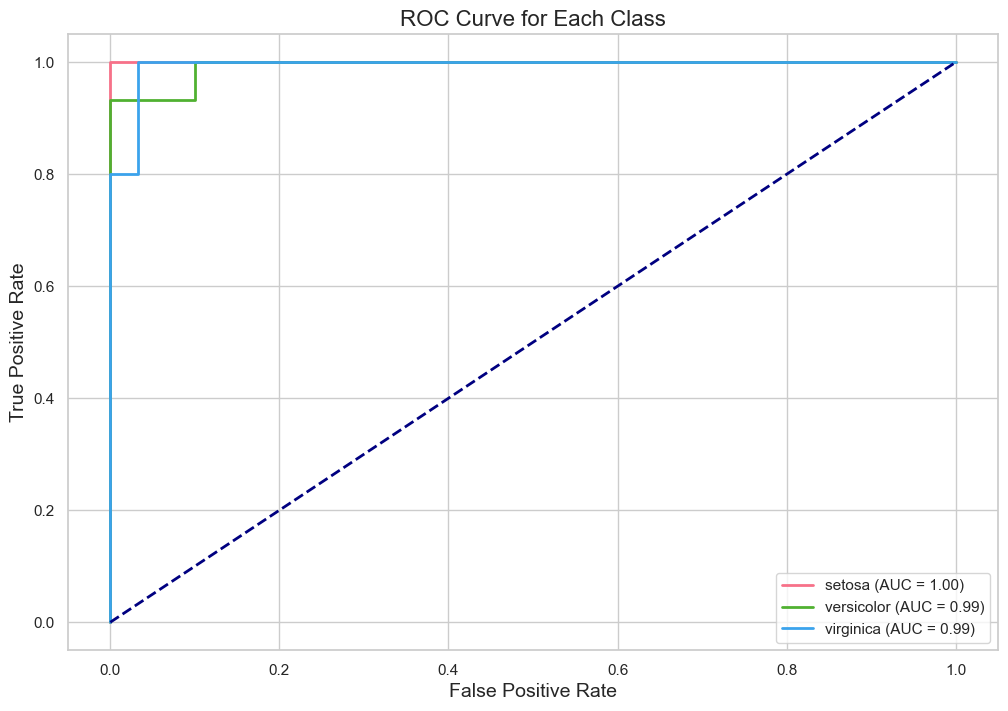

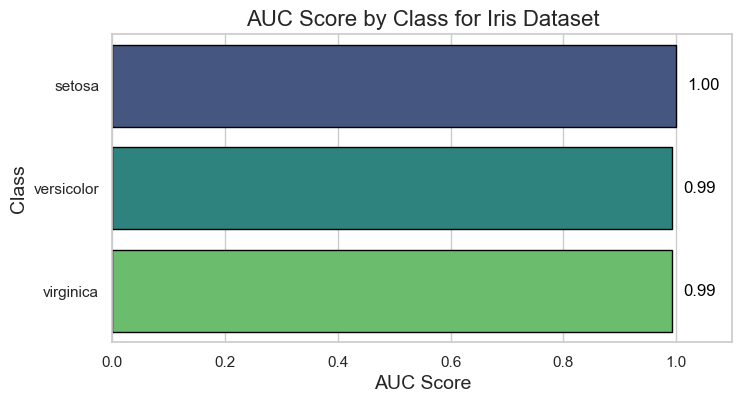

In [191]:
class_labels = ['setosa', 'versicolor', 'virginica']
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_prob = pipeline.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])

for i in range(y_test_bin.shape[1]):
    print(f"ROC AUC for {class_labels[i]}: {roc_auc[i]:.2f}")

    if roc_auc[i] == 1:
        print(f"{class_labels[i]} has a perfect AUC of 1, indicating a perfect model for this class.")
    elif roc_auc[i] == 0.5:
        print(f"{class_labels[i]} has an AUC of 0.5, indicating no discrimination ability for this class.")
    elif roc_auc[i] > 0.5:
        print(f"{class_labels[i]} has an AUC of {roc_auc[i]:.2f}, indicating that the model has some discriminatory power for this class.")
    else:
        print(f"{class_labels[i]} has an AUC of {roc_auc[i]:.2f}, indicating that the model's performance is worse than random guessing for this class.")


plt.figure(figsize=(12, 8))
colors = sns.color_palette("husl", len(roc_auc)) 

for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve for Each Class', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

auc_data = {
    'Class': class_labels,
    'AUC Score': [roc_auc[i] for i in range(len(class_labels))]
}
auc_df = pd.DataFrame(auc_data)

plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x='AUC Score', y='Class', data=auc_df, palette='viridis', edgecolor='black')

for index, row in auc_df.iterrows():
    bar_plot.text(row['AUC Score'] + 0.02, index, f'{row["AUC Score"]:.2f}', 
                  va='center', fontsize=12, color='black')

plt.xlabel('AUC Score', fontsize=14)
plt.ylabel('Class', fontsize=14)
plt.title('AUC Score by Class for Iris Dataset', fontsize=16)

# Adjust x-axis limit to make room for the text
plt.xlim(0, 1.1)

# Show plot
plt.show()


### **Classification Report**



**`sklearn.metrics.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, zero_division='warn')`**

The `classification_report` function provides a comprehensive summary of classification performance, including precision, recall, F1 score, and support for each class.


The classification report presents the following metrics for each class:

- **Precision**: The ratio of true positive predictions to the sum of true positive and false positive predictions.
- **Recall**: The ratio of true positive predictions to the sum of true positive and false negative predictions.
- **F1 Score**: The harmonic mean of precision and recall.
- **Support**: The number of true instances for each class.

### **Metrics Formulas**

- **Precision**:

  $$
  \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
  $$

- **Recall**:

  $$
  \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
  $$

- **F1 Score**:

  $$
  \text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
  $$

Where:
- **TP**: True Positives
- **FP**: False Positives
- **FN**: False Negatives

### **Parameters**

- **`y_true`**: array-like of shape (n_samples,)
  - True labels.

- **`y_pred`**: array-like of shape (n_samples,)
  - Predicted labels.

- **`labels`**: array-like of shape (n_classes), default=None
  - List of labels to include in the report. If None, all labels in `y_true` and `y_pred` are used.

- **`target_names`**: list of string, default=None
  - List of strings representing the names of the classes. If None, class names will be automatically generated.

- **`sample_weight`**: array-like of shape (n_samples,), default=None
  - Sample weights.

- **`digits`**: int, default=2
  - Number of decimal places to round the metrics to.

- **`zero_division`**: {0, 1, 'warn'}, default='warn'
  - Value to return when there is zero division. The default is to issue a warning and return `0`.

### **Returns**

- **`report`**: string
  - A text summary of the precision, recall, F1 score, and support for each class.



Unique values in y_test: [0 1 2]
Unique values in y_pred: [0 1 2]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



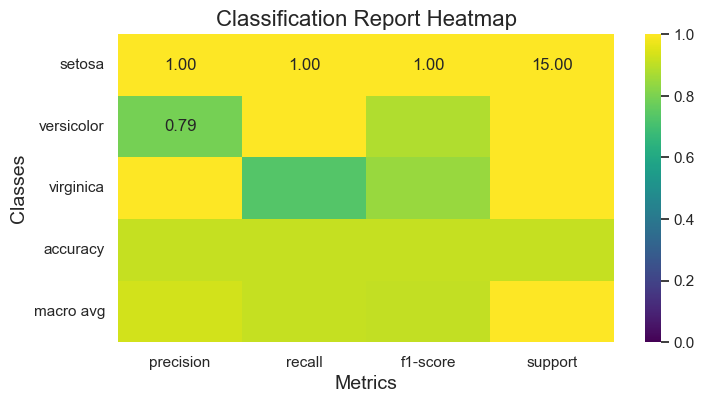

In [193]:
y_pred = pipeline.predict(X_test)

print(f"Unique values in y_test: {np.unique(y_test)}")
print(f"Unique values in y_pred: {np.unique(y_pred)}")

report = classification_report(y_test, y_pred, target_names=iris.target_names, output_dict=True)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap='viridis', fmt='.2f', cbar=True, vmin=0, vmax=1)
plt.title('Classification Report Heatmap', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Classes', fontsize=14)
plt.show()


### **cross_validatation**


**`sklearn.model_selection.cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')`**

Cross-validation is a statistical method used to evaluate the performance of a model by dividing the dataset into multiple subsets or folds. The model is trained on some folds and tested on the remaining folds. This process is repeated multiple times to ensure that the evaluation is robust and not dependent on any specific subset of the data.


The primary goal of cross-validation is to assess how the results of a statistical analysis will generalize to an independent dataset. It helps in tuning hyperparameters and avoiding overfitting by ensuring that the model performs well on unseen data.

### **Types of Cross-Validation**

1. **K-Fold Cross-Validation**: The dataset is divided into \( k \) subsets (folds). The model is trained on \( k-1 \) folds and validated on the remaining fold. This process is repeated \( k \) times, with each fold serving as the validation set once.

   - **Formula for K-Fold Cross-Validation**:
     $$
     \text{CV Score} = \frac{1}{k} \sum_{i=1}^{k} \text{Score}_i
     $$
     where \(\text{Score}_i\) is the performance score for the \(i\)-th fold.

2. **Leave-One-Out Cross-Validation (LOOCV)**: A special case of k-fold cross-validation where \( k \) is equal to the number of data points. Each data point is used as a single validation set, with the remaining data points used for training.

   - **Formula for LOOCV**:
     $$
     \text{LOOCV Score} = \frac{1}{n} \sum_{i=1}^{n} \text{Score}_i
     $$
     where \(n\) is the number of data points.

3. **Stratified K-Fold Cross-Validation**: Similar to k-fold cross-validation, but the data is split in such a way that each fold maintains the same class distribution as the entire dataset. This is particularly useful for imbalanced datasets.

4. **Time Series Cross-Validation**: Used for time series data where the data is divided into training and test sets in a way that preserves the temporal order.

### **Parameters**

- **`estimator`**: object
  - The model or algorithm to be evaluated.

- **`X`**: array-like or pd.DataFrame
  - Features or input data.

- **`y`**: array-like or pd.Series, default=None
  - Target labels.

- **`scoring`**: string, callable, or None, default=None
  - Metric used to evaluate the model.

- **`cv`**: int, cross-validation generator, or iterable, default=None
  - Determines the cross-validation splitting strategy.

- **`n_jobs`**: int, default=None
  - Number of jobs to run in parallel.

- **`verbose`**: int, default=0
  - Verbosity level.




Feature matrix shape: (150, 4)
Target vector shape: (150,)
Cross-Validation Results:
Mean Accuracy: 0.97 ± 0.02
Mean F1 Score (Macro): 0.97 ± 0.02
Mean ROC AUC (Macro): 1.00 ± 0.00


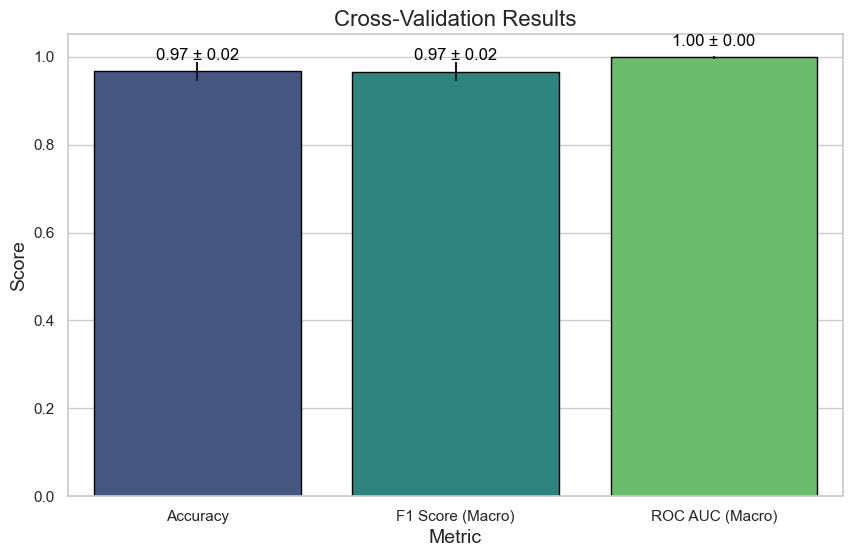

In [204]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
X = iris.data  
y = iris.target  
df = pd.DataFrame(X, columns=iris.feature_names)
print(f"Feature matrix shape: {df.shape}")
print(f"Target vector shape: {y.shape}")
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True))
])

pipeline.fit(df, y)
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

def roc_auc_scorer(estimator, X, y):
    y_pred_prob = estimator.predict_proba(X)
    y_bin = label_binarize(y, classes=np.unique(y))
    return roc_auc_score(y_bin, y_pred_prob, average='macro', multi_class='ovr')


cv_results = cross_validate(
    pipeline, 
    df, 
    y, 
    cv=5, 
    scoring={
        'accuracy': 'accuracy',
        'f1_macro': make_scorer(f1_score, average='macro'),
        'roc_auc': roc_auc_scorer
    },
    return_train_score=False
)

print("Cross-Validation Results:")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")
print(f"Mean F1 Score (Macro): {cv_results['test_f1_macro'].mean():.2f} ± {cv_results['test_f1_macro'].std():.2f}")
print(f"Mean ROC AUC (Macro): {cv_results['test_roc_auc'].mean():.2f} ± {cv_results['test_roc_auc'].std():.2f}")



metrics = {
    'Metric': ['Accuracy', 'F1 Score (Macro)', 'ROC AUC (Macro)'],
    'Mean': [
        cv_results['test_accuracy'].mean(),
        cv_results['test_f1_macro'].mean(),
        cv_results['test_roc_auc'].mean()
    ],
    'Std Dev': [
        cv_results['test_accuracy'].std(),
        cv_results['test_f1_macro'].std(),
        cv_results['test_roc_auc'].std()
    ]
}
df_metrics = pd.DataFrame(metrics)


sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Metric', y='Mean', data=df_metrics, palette='viridis', yerr=df_metrics['Std Dev'], capsize=0.2, edgecolor='black')

for index, row in df_metrics.iterrows():
    bar_plot.text(index, row['Mean'] + 0.02, f'{row["Mean"]:.2f} ± {row["Std Dev"]:.2f}', 
                  ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Metric', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Cross-Validation Results', fontsize=16)

plt.show()
